In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.dtypes


User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [4]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.columns


Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [7]:
df['Gender'].replace(['Male','Female'],[1,0],inplace=True)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [8]:
df.corr()

,User ID,Gender,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.025249,-0.000721,0.071097,0.007120
Gender,-0.025249,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.000721,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,-0.060435,0.155238,1.000000,0.362083
Purchased,0.007120,-0.042469,0.622454,0.362083,1.000000


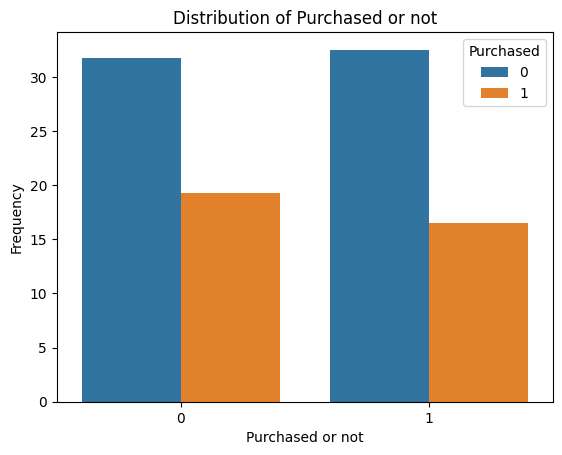

In [9]:
sns.countplot(df, x="Gender", hue="Purchased", stat="percent")
plt.title('Distribution of Purchased or not')
plt.xlabel('Purchased or not')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Frequency')

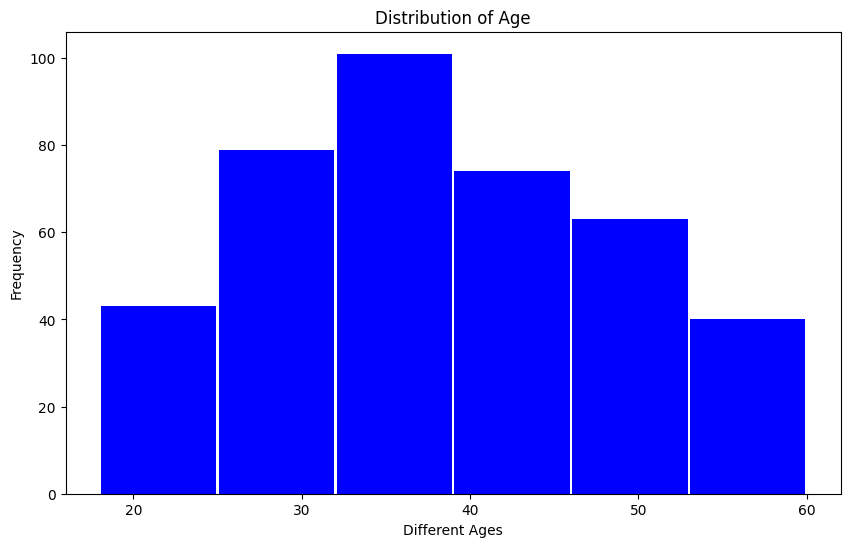

In [10]:
plt.figure(figsize = (10,6))
plt.hist(df['Age'], bins  = 6, color = 'blue', rwidth = 0.98)
plt.title('Distribution of Age')
plt.xlabel('Different Ages')
plt.ylabel('Frequency')

In [11]:
X = df.iloc[:,[2,3]].values

In [12]:
y = df.iloc[:,4].values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [15]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [16]:
y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm1 = confusion_matrix(y_test,y_pred)
print('Confusion Matrix: ')
print(cm1)   
ac1 = accuracy_score(y_test, y_pred)*100
print('Accuracy Score:')
print(ac1)

Confusion Matrix: 
[[65  3]
 [ 8 24]]
Accuracy Score:
89.0


In [18]:
tp=cm1[0][0]
tn=cm1[1][1]
fp=cm1[1][0]
fn=cm1[0][1]
total=tp+tn+fp+fn
error_rate=(fp+fn)/(total)
print('error rate: ')
print(error_rate)

error rate: 
0.11


In [19]:
 from sklearn.metrics import classification_report
print('                        classification report:')
print('')
print(classification_report(y_test,y_pred))

                        classification report:

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100

